In [1]:
import os
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

from utils.load_config import load_config
from utils.load_dotenv import load_dotenv

from deeplearning.weather_cnn import WeatherCNN
from deeplearning.weather_lstm import WeatherLSTM
from deeplearning.weather_transformer import WeatherTransformer

from preprocessors.weather_preprocessor import WeatherPreprocessor

c:\Users\Ken Zhang\Git\weather-prediction-model\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
load_dotenv()

CONFIGS_DIR = os.getenv("CONFIGS_DIR")
DATASETS_DIR = os.getenv("DATASETS_DIR")
PROCESSED_DIR = os.getenv("PROCESSED_DIR")

WEATHER_DATASET = os.path.join(DATASETS_DIR, "weather_sj_2010_2024.csv")

In [3]:
print(f"GPU availability: {torch.cuda.is_available()}")

GPU availability: True


In [4]:
preprocessors = WeatherPreprocessor(WEATHER_DATASET)
preprocessors.clean_dataset()

In [5]:
X, y = preprocessors.to_tensor(normalize=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

In [6]:
cnn_config_path = os.path.join(CONFIGS_DIR, "weather_cnn_config.yaml")
weather_cnn_config = load_config(cnn_config_path)

lstm_config_path = os.path.join(CONFIGS_DIR, "weather_lstm_config.yaml")
weather_lstm_config = load_config(lstm_config_path)

transformer_config_path = os.path.join(CONFIGS_DIR, "weather_transformer_config.yaml")
weather_transformer_config = load_config(transformer_config_path)

print("Training CNN")
weather_cnn_model = WeatherCNN(config=weather_cnn_config)
weather_cnn_model.normalization_params = preprocessors.normalization_params
weather_cnn_model.fit(train_loader=train_loader, val_loader=val_loader)

print("\nTraining LSTM")
weather_lstm_model = WeatherLSTM(config=weather_lstm_config)
weather_lstm_model.normalization_params = preprocessors.normalization_params
weather_lstm_model.fit(train_loader=train_loader, val_loader=val_loader)

# print("\nTraingin Transformer")
# weather_transformer_model = WeatherTransformer(config=weather_transformer_config)
# weather_transformer_model.normalization_params = preprocessors.normalization_params
# weather_transformer_model.fit(train_loader=train_loader, val_loader=val_loader)

Training CNN


Training: 100%|██████████| 6000/6000 [00:48<00:00, 122.66it/s, epoch=100, loss=0.324, mse=280, mae=7.13, r2=0.677]



Final Train Loss: 0.3208
Final Train MSE: 279.7195
Final Train MAE: 7.1274
Final Train R²: 0.6767
Validation Loss: 0.2811
Validation MSE: 246.6423
Validation MAE: 6.4501
Validation R²: 0.7298

Training LSTM


Training: 100%|██████████| 6000/6000 [01:12<00:00, 83.21it/s, epoch=100, loss=0.267, mse=234, mae=6.13, r2=0.733]



Final Train Loss: 0.2641
Final Train MSE: 234.2582
Final Train MAE: 6.1300
Final Train R²: 0.7332
Validation Loss: 0.1888
Validation MSE: 173.8260
Validation MAE: 4.8397
Validation R²: 0.8180


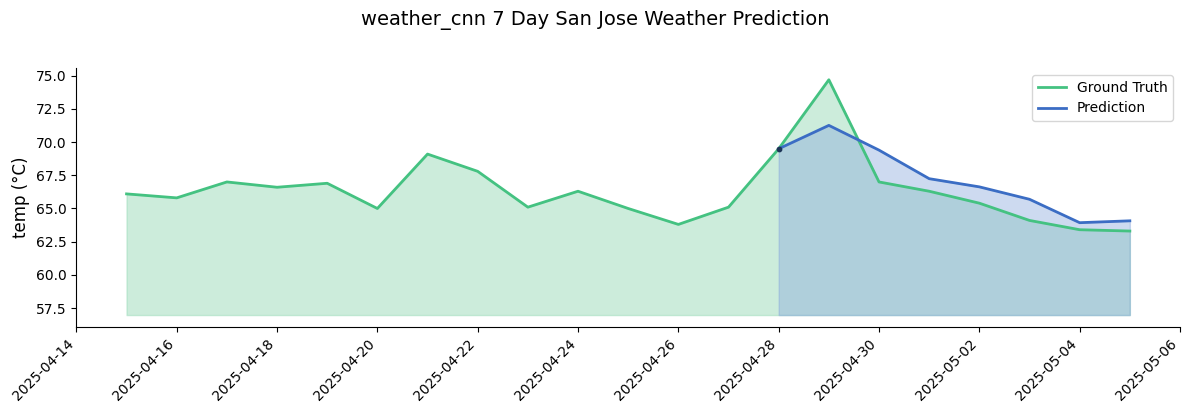

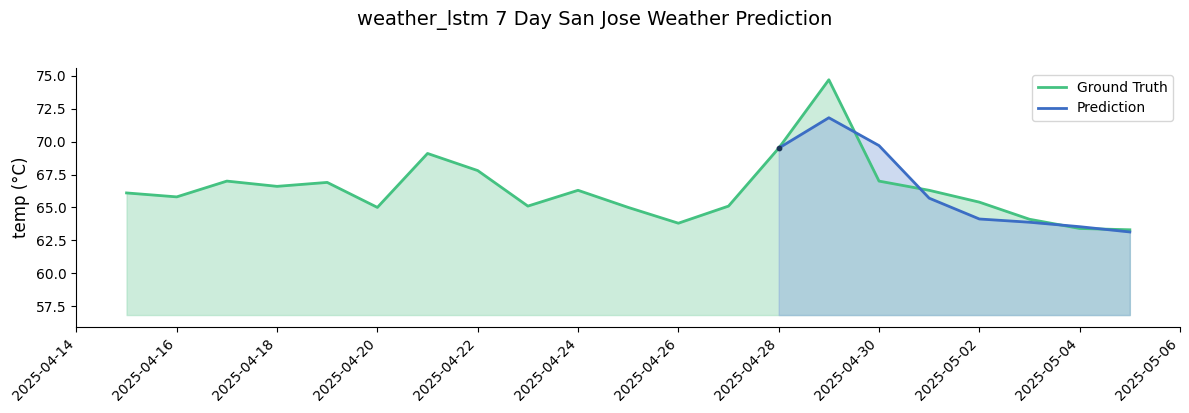

In [19]:
sample_index = np.random.randint(0, len(X))

X_sample = X[sample_index]
y_sample = y[sample_index]

feature_names = ["temp"]

weather_cnn_model.visualize_predictions(X_sample, y_sample, feature_names)
weather_lstm_model.visualize_predictions(X_sample, y_sample, feature_names)
# weather_transformer_model.visualize_predictions(X_sample, y_sample, feature_names)